### STC one of the banks in India approched me to help them predict the churn ratio of their customers. So as a data scientist, it is my duty to build an end to end machine learning pipeline for my client to use the model to predict the churn ratio of the customers. I will be using a multi layer perceptron model to do the predcition.
First I will import libraries. Then the next step will be loading the dataset. After that I will print the name and data type of each coloumn. 
The most important procedures begins now with the spliting of dataset into train and test.
Now I will use the train data to check for null values and preprocessing.
Then I will display visuals to understand the dataset more. The first figure shows the comparison between churned customers and others.
In the 2nd graph, I have displayed the top 5 customers with the highest credit score.
3rd one shows among total customers how many are male and female.
Next is the preprocessing and feature engineering part where I will seperate the target and features vectors. Since I am using a churn dataset, I will use OneHot encoder to encode the dataset.
Since the dataset have high input variables, i will use dimentionality reduction to reduce it. Then wil do the standarisation.
Next I will tune the hyper parameter to find the best parameters for MLP and also the accuracy of the validation data.
Then I will use the trained model for testing to find the accuraacy and other metrics, which can be used for the predcition process.

DATASET - https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import sklearn.model_selection
import sklearn.neural_network
import sklearn.metrics
import sklearn.decomposition


## VISUALIZATION LIBRARIES

In [2]:
import seaborn
import seaborn as sns
import matplotlib.figure
sns.set(color_codes = True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure 

## LOADING THE DATASET

In [3]:
df = pd.read_csv("../../datasets/CHURN.csv")
df = df.set_index("RowNumber")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## PRINTING DTYPES OF EACH COLOUMNS

In [4]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## COLUMN NAMES

In [5]:
print(df.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


## SPLITTING DATASET INTO TRAIN AND TEST

In [6]:
df_train,df_test = sklearn.model_selection.train_test_split(df)

## SIZE OF TEST AND TRAIN DATA

In [7]:
print("df_train size : ", df_train.shape) 
print("df_test size : ", df_test.shape) 

df_train size :  (7500, 13)
df_test size :  (2500, 13)


## CHECKING FOR NULL VALUES

In [8]:
df_train.isnull()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1580,False,False,False,False,False,False,False,False,False,False,False,False,False
9200,False,False,False,False,False,False,False,False,False,False,False,False,False
7685,False,False,False,False,False,False,False,False,False,False,False,False,False
8367,False,False,False,False,False,False,False,False,False,False,False,False,False
2117,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,False,False,False,False,False,False,False,False,False,False,False,False,False
5979,False,False,False,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,False,False,False


Here i have used isnull() function to check for null values. If there are "True" displaying, it means there are null values.

In [9]:
df_train.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

From both the above, it can be seen that there are no null values.

## VISUALIZATION OF DATASET

I am going to use countplot to display the comparison between churned customers and those who have not churned. It can be seen that "0" which is non churned customers are more compared to "1", the churned customers.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

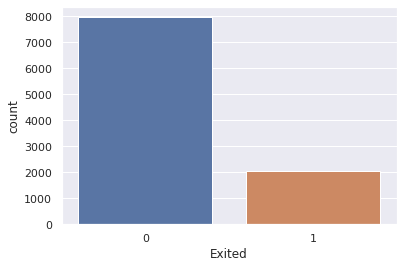

In [10]:
sns.countplot(df['Exited'])

Next I will plot a violin graph, which shows top 5 customers with the highest credit score. 

<AxesSubplot:xlabel='CustomerId', ylabel='CreditScore'>

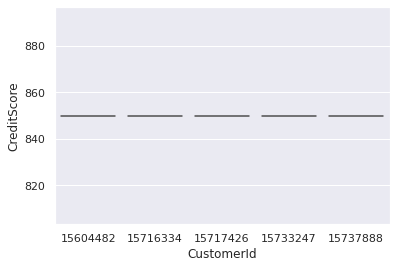

In [11]:
sns.violinplot(
    x='CustomerId',
    y='CreditScore',
    data=df.nlargest(5, 'CreditScore')
)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

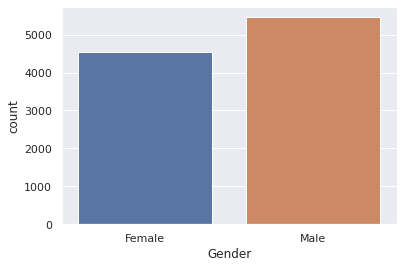

In [12]:
sns.countplot(df['Gender'])

Among the total numbe rof customers, it can be seen that male are more than female.

## DATA PREPROCESSING AND FEATURE ENGINEERING

### SEPERATING TARGET AND FEATURE LABEL

Here I have splitted the seperate target and feature labels and have also printed the sizes.

In [13]:
x_train = df_train.drop(["Exited"],axis = 1)
y_train = df_train["Exited"]

x_test = df_test.drop(["Exited"], axis = 1)
y_test = df_test["Exited"]

print("x_test size : ",x_test.shape) 
print("x_train size : ",x_train.shape)
print("y_train size : ",y_train.shape)
print("y_test size : ",y_test.shape)

x_test size :  (2500, 12)
x_train size :  (7500, 12)
y_train size :  (7500,)
y_test size :  (2500,)


### ENCODING THE DATASET

In [14]:
enc = sklearn.preprocessing.OneHotEncoder(handle_unknown = "ignore")
enc.fit(x_train)

x_train = enc.transform(x_train)
x_test = enc.transform(x_test)


print("x train : ",x_train.shape)
print("x test : ",x_test.shape)

x train :  (7500, 22825)
x test :  (2500, 22825)


Here I have used One Hot encoder to encode the dataset to obtain a specified format for efficient transmission.

### STandization of dataset

In [15]:
stand = sklearn.preprocessing.StandardScaler(with_mean = False)
stand.fit(x_train)

x_train = stand.transform(x_train)
x_test = stand.transform(x_test)

print("x train : ",x_train.shape)
print("x test : ",x_test.shape)

x train :  (7500, 22825)
x test :  (2500, 22825)


Here I have kept with_mean as False becuase I dont want to center the data before scaling as it can be too large to fit in memory

Here I have done Standardization of dataset so that the mean of observed value is 0 and the standard deviation is 1.

## DIMENSIONALITY REDUCTION

In [16]:
PCA = sklearn.decomposition.PCA(n_components = 20)
PCA.fit(x_train.toarray())

x_train = PCA.transform(x_train.toarray())

x_test = PCA.transform(x_test.toarray())

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)

x_train:  (7500, 20)
x_test:  (2500, 20)


Since the input variables of the data set is too high, there is a chance for curse of dimensionality. And I also set number of components into 20, because I only need 20 feature vectors.

## HYPERPARAMETER TUNING

Here I will use Grid search for doing hyperparamter tuning to find the best parameter for multi layer perceptron and will also find the accuracy of the  validation.

In [17]:
para_grid = {
    "solver" : ["lbfgs","sgd","adam"],
    "max_iter" : [100,200],
    "batch_size" : [10,20,50,100,200],
    "hidden_layer_sizes" : [(50),(100),(50,50),(50,100),(100,50),(100,100)],
    "early_stopping" : [True,False]

    
   
}

model = sklearn.model_selection.GridSearchCV(sklearn.neural_network.MLPClassifier(),
                                            para_grid,scoring = "accuracy",cv =5, n_jobs= None)

model.fit(x_train,y_train)
print("Accuracy of the MLP classifier = {:.2f}".format(model.best_score_))
print("best hyper paramters are = {}".format(model.best_params_))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Accuracy of the MLP classifier = 0.80
best hyper paramters are = {'batch_size': 200, 'early_stopping': True, 'hidden_layer_sizes': (50, 100), 'max_iter': 100, 'solver': 'adam'}


Here the hyper paramters I have used are solver,max_iter,batch_size and hidden_layer_size.
hidden_layer_size is a tupple which tells you how many layers you want, by default it is 100.
solver is used for weight optimaziation which have different versions of gradient decent. By default it is adam.
batch_size is the size of mini batch I used.
max_iter is simply the number of epochs that is how manh times each data points will be used.By default it is 200.


Here I got some warning because the number of epochs which I entered was not enough.

## TESTING THE MODEL

Next I am going to test the model, which I have trained and will print the accuracy of the whole model.

In [18]:
y_predict = model.predict(x_test)
acc =  sklearn.metrics.accuracy_score(y_test,y_predict)
print("accuracy of the model = ",acc)

accuracy of the model =  0.7908


So we got the accuracy of the model, now for the final part I will calculate and print different metrics like confusion matrix, precision, f1 score and recall to understand the model a bit more.

## TO UNDERSTAND THE MODEL A LITTLE MORE

In [21]:
cm =  sklearn.metrics.confusion_matrix(y_test,y_predict)
precision,recall,f1,support = sklearn.metrics.precision_recall_fscore_support(y_test,y_predict)
print("confusion matrix is : \n",cm)
print("precision : ",precision)
print("recall : ",recall)
print("f1 : ",f1)


confusion matrix is : 
 [[1977    0]
 [ 523    0]]
precision :  [0.7908 0.    ]
recall :  [1. 0.]
f1 :  [0.8831807 0.       ]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now the model is ready for the bank to use it. The model needs imporvement in the hyper paramter tuning and part and some small adjustments, after that the pipline can be used for many applications. Any company can check their churn ratio using the pipeline.